# 선박 배관 자동 경로 설정 (RL + Curriculum Learning)

이 노트북은 선박의 배관 경로를 자동으로 설정하기 위해 강화학습(PPO)과 커리큘럼 러닝을 적용한 프로젝트를 실행합니다.
**Google Drive를 연동하여 학습 데이터를 영구적으로 보존합니다.**

## 1. 구글 드라이브 마운트 및 자동 경로 탐색
학습된 모델이 세션 종료 후에도 사라지지 않도록 구글 드라이브를 연결하고, **프로젝트 폴더 위치를 자동으로 찾습니다.**

In [2]:
from google.colab import drive
import os
import sys

# 1. 구글 드라이브 마운트
if not os.path.exists('/content/drive'):
    print("구글 드라이브 마운트 중...")
    drive.mount('/content/drive')

def find_project_root(start_path, target_file='main.py'):
    """target_file이 있는 디렉토리를 재귀적으로 찾습니다."""
    print(f"'{target_file}' 파일을 '{start_path}' 에서 찾는 중입니다...")
    for root, dirs, files in os.walk(start_path):
        if target_file in files:
            return root
    return None

# 2. 프로젝트 경로 찾기
# 먼저 예상되는 기본 경로 확인
EXPECTED_PATH = '/content/drive/MyDrive/APR_curriculumRL'
PROJECT_PATH = None

if os.path.exists(os.path.join(EXPECTED_PATH, 'main.py')):
    PROJECT_PATH = EXPECTED_PATH
    print(f"기존 경로에서 프로젝트를 찾았습니다: {PROJECT_PATH}")
else:
    # 경로가 없다면 드라이브 전체 또는 로컬에서 검색
    print(f"기본 경로({EXPECTED_PATH})에 파일이 없습니다. 전체 검색을 시작합니다.")

    # 로컬(/content) 검색 (직접 업로드한 경우)
    PROJECT_PATH = find_project_root('/content', 'main.py')

    # 로컬에 없다면 드라이브 전체 검색 (시간이 좀 걸릴 수 있음)
    if PROJECT_PATH is None and os.path.exists('/content/drive'):
        # MyDrive 내에서만 검색 (전체 드라이브는 너무 큼)
        PROJECT_PATH = find_project_root('/content/drive/MyDrive', 'main.py')

if PROJECT_PATH:
    os.chdir(PROJECT_PATH)
    # 모듈 임포트를 위해 시스템 경로에 추가
    if PROJECT_PATH not in sys.path:
        sys.path.append(PROJECT_PATH)
    print(f"\n🎉 성공! 작업 디렉토리를 변경했습니다: {os.getcwd()}")
    print(f"파일 목록: {os.listdir(PROJECT_PATH)}")
else:
    print("\n❌ 에러: 'main.py' 파일을 찾을 수 없습니다.")
    print("1. 구글 드라이브에 'APR_curriculumRL' 폴더가 있는지 확인해주세요.")
    print("2. 폴더 안에 'main.py' 파일이 있는지 확인해주세요.")
    raise FileNotFoundError("프로젝트 경로를 찾지 못했습니다.")

구글 드라이브 마운트 중...
Mounted at /content/drive
기존 경로에서 프로젝트를 찾았습니다: /content/drive/MyDrive/APR_curriculumRL

🎉 성공! 작업 디렉토리를 변경했습니다: /content/drive/MyDrive/APR_curriculumRL
파일 목록: ['config', 'agent', 'curriculum', 'environment', 'training', 'utils', 'requirements.txt', '.git', 'main.py', 'models', 'results', 'colab_runner.ipynb']


## 2. 환경 설정
필요한 라이브러리를 설치합니다.

In [3]:
!pip install numpy matplotlib torch tqdm plotly

## 3. 학습 시작
강화학습 에이전트를 학습시킵니다. 모델은 구글 드라이브의 `models` 폴더에 저장됩니다.

In [4]:
# 현재 디렉토리가 올바른지 다시 확인
import os
if not os.path.exists('main.py'):
    print("⚠️ 경고: 현재 경로에 main.py가 없습니다. 위 1번 셀을 다시 실행해주세요.")
else:
    print(f"학습을 시작합니다. 경로: {os.getcwd()}")
    # 에피소드 수는 필요에 따라 조절하세요
    !python main.py --mode train --episodes 5000 --device cuda

학습을 시작합니다. 경로: /content/drive/MyDrive/APR_curriculumRL

 선박 배관 자동 경로 설정 시스템 (강화학습 기반)

⚠️  CUDA를 사용할 수 없습니다. CPU로 전환합니다.
사용 디바이스: CPU

1. 설정 초기화 중...

=== 하이퍼파라미터 설정 ===
Learning Rate: 0.0003
Batch Size: 64
Gamma: 0.99
Entropy Coef: 0.01


2. 커리큘럼 학습 시스템 초기화 중...
3. 센서 시스템 및 보상 계산기 초기화 중...
   - 센서 개수: 26개
   - 관찰값 크기: 29개
4. PPO 에이전트 초기화 중...
   - 입력 크기: 29
   - 행동 크기: 6
   - 신경망 파라미터: 75,271개

6. 트레이너 초기화 중...

 시스템 초기화 완료!

학습 모드: PPO 강화학습 시작

학습 시작: 총 5000 에피소드
Ep 10/5000 | Stage: 0 | Reward: -0.1 | Steps: 4 | Success: 0.0% | Loss: 0.0000
Ep 20/5000 | Stage: 0 | Reward: -0.4 | Steps: 7 | Success: 0.0% | Loss: 0.0000
Ep 30/5000 | Stage: 0 | Reward: -1.6 | Steps: 2 | Success: 0.0% | Loss: 1.3499
Ep 40/5000 | Stage: 0 | Reward: -1.4 | Steps: 9 | Success: 0.0% | Loss: 0.7428
Ep 50/5000 | Stage: 0 | Reward: -1.5 | Steps: 2 | Success: 0.0% | Loss: 0.0000
Ep 60/5000 | Stage: 0 | Reward: 3.7 | Steps: 14 | Success: 0.0% | Loss: 0.0000
Ep 70/5000 | Stage: 0 | Reward: -2.0 | Steps: 6 | Succes

## 4. 결과 평가 및 시각화
학습된 모델을 평가하고 결과를 시각화합니다.
**참고:** 시각화가 Colab 내에서 바로 보이도록 Python 코드로 직접 실행합니다.

모델 로드 완료: models/ppo_ep5000.pt

평가 시작: 총 3 에피소드
Ep 1: Reward -1.0 | Result: collision
시각화 저장됨: results/eval_ep1_collision.png


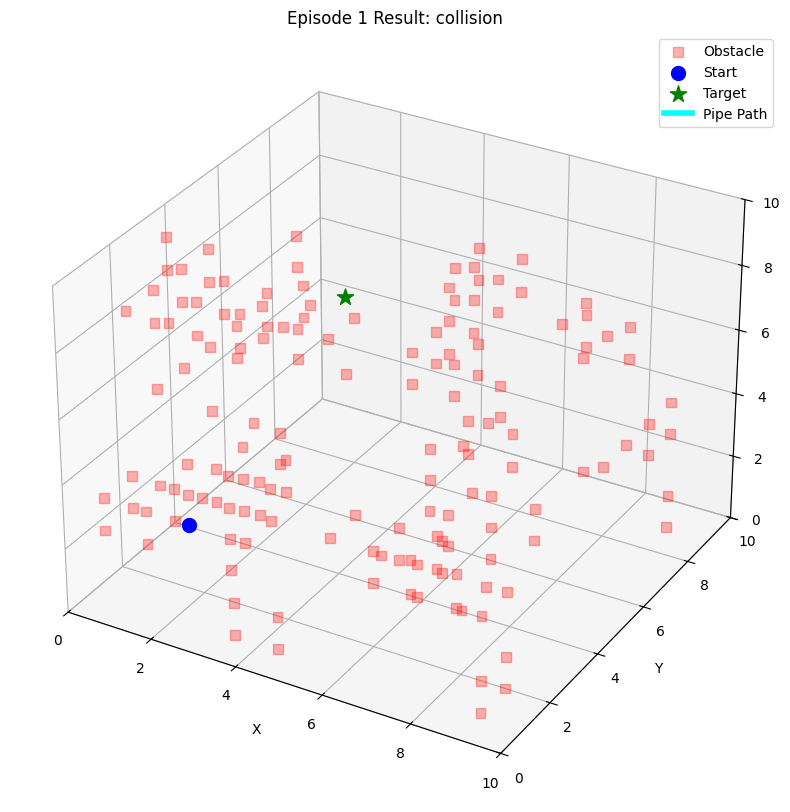

인터랙티브 시각화 저장됨: results/eval_ep1_collision.html


Ep 2: Reward 15.3 | Result: goal_reached
시각화 저장됨: results/eval_ep2_goal_reached.png


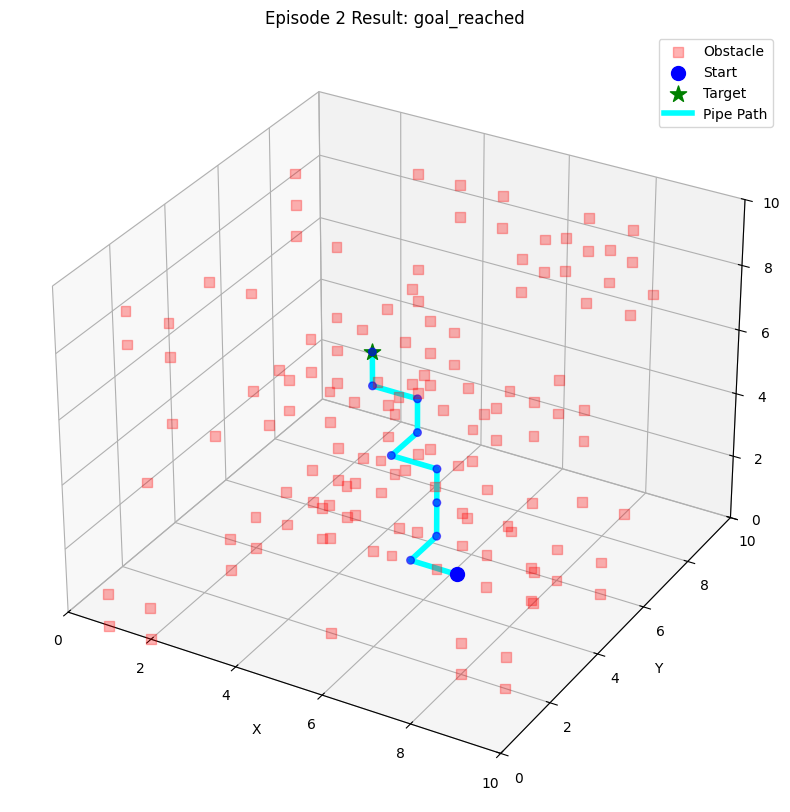

인터랙티브 시각화 저장됨: results/eval_ep2_goal_reached.html


Ep 3: Reward 14.2 | Result: goal_reached
시각화 저장됨: results/eval_ep3_goal_reached.png


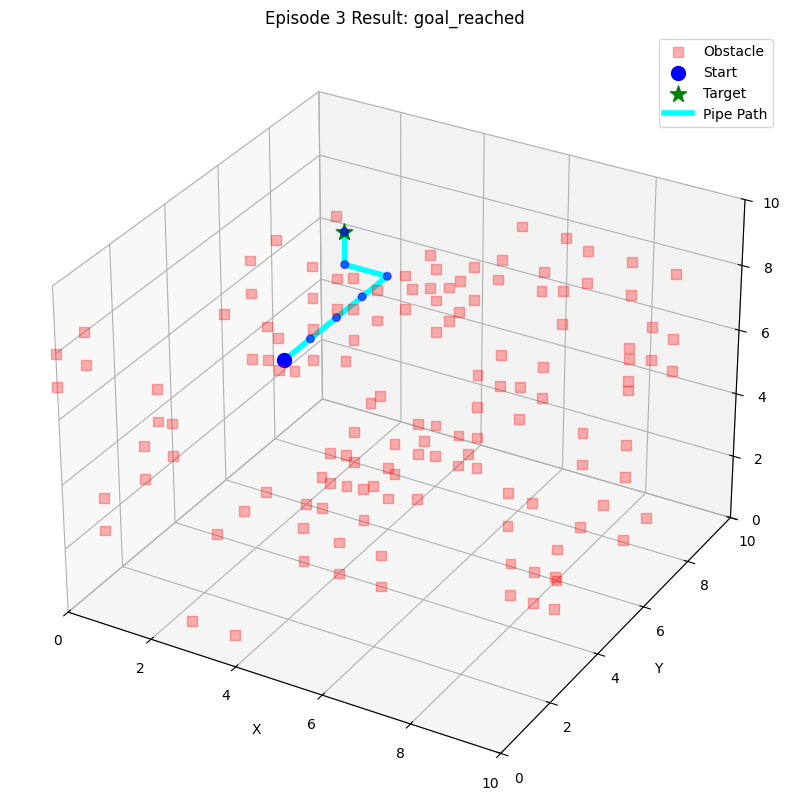

인터랙티브 시각화 저장됨: results/eval_ep3_goal_reached.html



=== 평가 결과 ===
성공률: 66.7%
평균 보상: 9.5


In [5]:
%matplotlib inline
import sys
import os
from google.colab import drive

# 자동 경로 설정 (런타임 재시작시 대비)
if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')

if '/content/drive/MyDrive/APR_curriculumRL' not in sys.path:
    # 기본 경로 시도
    if os.path.exists('/content/drive/MyDrive/APR_curriculumRL'):
        os.chdir('/content/drive/MyDrive/APR_curriculumRL')
        sys.path.append('/content/drive/MyDrive/APR_curriculumRL')
    else:
        print("⚠️ 경로를 자동으로 찾을 수 없습니다. 1번 셀을 먼저 실행해주세요.")

import torch
from config.hyperparameters import HyperParameters
from config.environment_config import EnvironmentConfig
from curriculum.curriculum_manager import CurriculumManager
from agent.ppo_agent import PPOAgent
from agent.sensor import RaySensor
from agent.reward_calculator import RewardCalculator
from training.trainer import Trainer

# 평가 설정
model_path = 'models/ppo_ep5000.pt'  # 평가할 모델 경로 (필요시 수정)
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 컴포넌트 초기화
hyperparams = HyperParameters()
env_config = EnvironmentConfig()
curriculum = CurriculumManager(env_config, hyperparams)
sensor = RaySensor(max_range=3)
reward_calc = RewardCalculator(hyperparams)

# 에이전트 초기화
input_size = sensor.get_observation_size()
action_size = 6  # 상하좌우전후
ppo_agent = PPOAgent(input_size, action_size, hyperparams, device)

# 모델 로드
if os.path.exists(model_path):
    ppo_agent.load(model_path)
    print(f"모델 로드 완료: {model_path}")

    # Trainer 생성 및 평가 실행
    trainer = Trainer(curriculum, sensor, reward_calc, ppo_agent, hyperparams)
    trainer.evaluate(num_episodes=3, visualize=True)
else:
    print(f"⚠️ 모델 파일을 찾을 수 없습니다: {model_path}")
    print("학습을 먼저 완료했는지, 경로가 맞는지 확인해주세요.")